<a href="https://colab.research.google.com/github/zcqin/PRML-2025/blob/main/Basics_Python_Coding_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Basics of Python Coding - Part 4**
**Zengchang Qin (PhD)**

Feb 02, 2024

zengchang.qin@gmail.com

In [ ]:
import numpy as np

# Define your 2x2 matrix A
A = np.array([[2, 1], [3, -1]])  # Replace a, b, c, d with your matrix elements

# Define the power m
m = 30  # Replace 3 with the desired power

# Calculate A raised to the power of m
A_power_m = np.linalg.matrix_power(A, m)
eigenvalues, eigenvectors = np.linalg.eig(A)

print("A raised to the power of", m, ":")
print(A_power_m)


A raised to the power of 30 :
[[19580149596637  5164501096416]
 [15493503289248  4086646307389]]


In [ ]:
import numpy as np

# Define a 2x2 matrix A
A = np.array([[4, 1],
              [2, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Define a function to compute A^m and project it onto the eigenvectors
def power_and_project(A, m, eigenvectors):
    # Compute A^m
    Am = np.linalg.matrix_power(A, m)

    # Project A^m onto the eigenvectors
    projection_1 = np.dot(Am, eigenvectors[:, 0])  # Projection onto the first eigenvector
    projection_2 = np.dot(Am, eigenvectors[:, 1])  # Projection onto the second eigenvector

    return projection_1, projection_2

# Compute A^m for m=1, 10, 50, and 100 to demonstrate the dominance
m_values = [1, 10, 50, 100]
projections = [power_and_project(A, m, eigenvectors) for m in m_values]

# Display the results
for m, projection in zip(m_values, projections):
    print(f"For m={m}:")
    print(f"Projection onto the first eigenvector: {projection[0]}")
    print(f"Projection onto the second eigenvector: {projection[1]}\n")


For m=1:
Projection onto the first eigenvector: [3.53553391 3.53553391]
Projection onto the second eigenvector: [-0.89442719  1.78885438]

For m=10:
Projection onto the first eigenvector: [6905339.66002488 6905339.66002488]
Projection onto the second eigenvector: [-457.94672179  915.89344358]

For m=50:
Projection onto the first eigenvector: [-4.79177764e+18 -4.79177764e+18]
Projection onto the second eigenvector: [-8.25013826e+18 -8.24862771e+18]

For m=100:
Projection onto the first eigenvector: [-2.71736757e+18 -2.71736757e+18]
Projection onto the second eigenvector: [26.63153689 26.63153689]



How the transition matrix will converge, the final state is just the dominating
eigenvector

[[0.66666667]
 [0.33333333]]


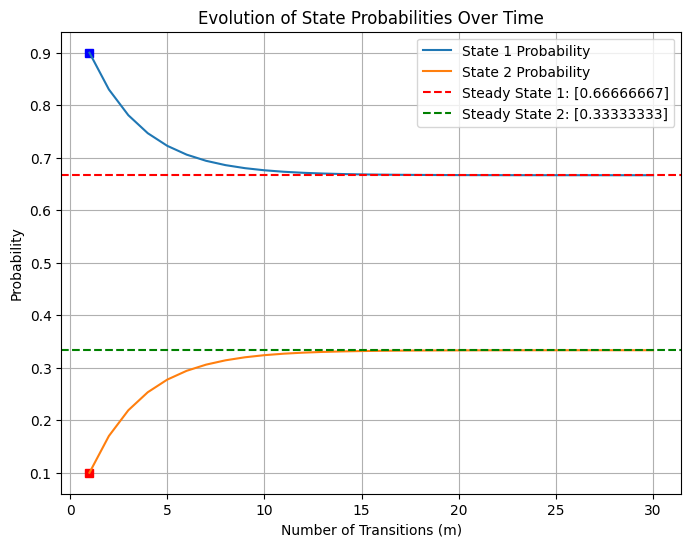

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transition matrix T
T = np.array([[0.9, 0.1],
              [0.2, 0.8]])

# Initial state
initial_state = np.array([1, 0])

# Number of steps
steps = range(1, 31)  # From 1 to 50

# Storage for state distributions
states_over_time = np.zeros((len(steps), T.shape[0]))

# Compute the state distribution over time
for i, m in enumerate(steps):
    Tm = np.linalg.matrix_power(T, m)
    state_m = np.dot(initial_state, Tm)
    states_over_time[i] = state_m

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(steps[0], states_over_time[0, 0], 'bs')
plt.plot(steps[0], states_over_time[0, 1], 'rs')

plt.plot(steps, states_over_time[:, 0], label='State 1 Probability')
plt.plot(steps, states_over_time[:, 1], label='State 2 Probability')

# Compute steady-state vector for comparison
eigenvalues_T, eigenvectors_T = np.linalg.eig(T.T)
index_of_one = np.isclose(eigenvalues_T, 1)

steady_state_vector = eigenvectors_T[:, index_of_one].real
steady_state_vector /= steady_state_vector.sum()

print(steady_state_vector)

# Add steady state line for comparison
plt.axhline(y=steady_state_vector.flatten()[0], color='r', linestyle='--', label=f'Steady State 1: {steady_state_vector[0]}')
plt.axhline(y=steady_state_vector.flatten()[1], color='g', linestyle='--', label=f'Steady State 2: {steady_state_vector[1]}')

plt.xlabel('Number of Transitions (m)')
plt.ylabel('Probability')
plt.title('Evolution of State Probabilities Over Time')
plt.legend()
plt.grid(True)
plt.show()
